<a href="https://colab.research.google.com/github/Mariam-mostafa3/prediction_mpg/blob/main/mpg__prediction_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mpg _prediction_using_linear_regression
#1-import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
#2-read data
data=pd.read_csv("/content/Data.csv")

In [ ]:
#3-exploration the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
#4-print the head of the file
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
#5-data preprossissing
#drop unnecessary columns
data=data.drop(['displacement','cylinders','car name'],axis=1)


In [ ]:
#convert objects in data to null value and drop it
data['horsepower'] = data['horsepower'].replace('?',np.nan)
data.dropna(inplace=True)
data['horsepower'] = data['horsepower'].astype(int)

In [ ]:
data.head()

,mpg,horsepower,weight,acceleration,model year,origin
0,18.0,130,3504,12.0,70,1
1,15.0,165,3693,11.5,70,1
2,18.0,150,3436,11.0,70,1
3,16.0,150,3433,12.0,70,1
4,17.0,140,3449,10.5,70,1


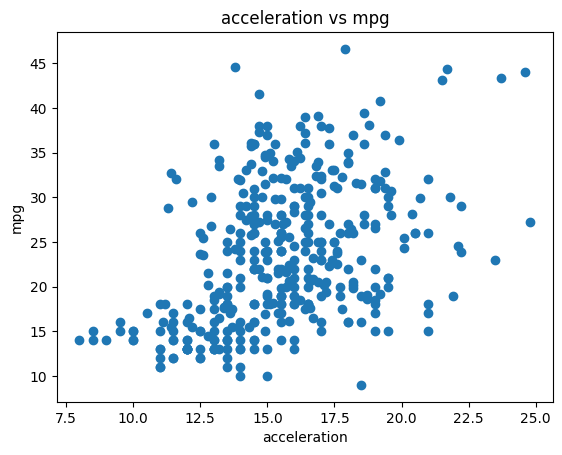

In [ ]:
#6-data visualization
plt.scatter(data['acceleration'],data['mpg'])
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.title('acceleration vs mpg')
plt.show()

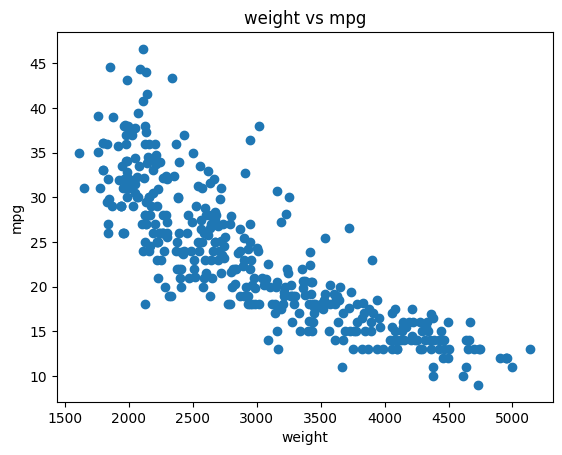

In [ ]:
#data visualization
plt.scatter(data['weight'],data['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('weight vs mpg')
plt.show()

In [ ]:
#7-features
features=data.drop(['mpg'],axis=1)
features.head()

,horsepower,weight,acceleration,model year,origin
0,130,3504,12.0,70,1
1,165,3693,11.5,70,1
2,150,3436,11.0,70,1
3,150,3433,12.0,70,1
4,140,3449,10.5,70,1


In [ ]:
#8-label
label=data['mpg']
label=pd.DataFrame(label) #in table
label

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [ ]:
#splitting data train,test
features_train,features_test,label_train,label_test=train_test_split(features,label,test_size=0.25,random_state=10)


In [ ]:
features_test.shape

(98, 5)

In [ ]:
features_train.shape

(294, 5)

In [ ]:
label_train.shape

(294, 1)

In [ ]:
#- model
#call model
model=LinearRegression()

In [ ]:
model.fit(features_train, label_train)

LinearRegression()

In [ ]:
prediction=model.predict(features_test)
prediction=pd.DataFrame(prediction)
prediction.head()

,0
0,27.247829
1,30.020132
2,22.774198
3,36.153249
4,17.696882


In [ ]:
label_test = pd.DataFrame(label_test)
label_test.reset_index(drop = True, inplace = True)
label_test.head()

,mpg
0,21.5
1,29.0
2,23.9
3,35.1
4,17.5


In [ ]:
#concatination the data
new_data=pd.concat([label_test, pd.DataFrame(prediction)], axis=1, join='inner')


In [ ]:
new_data.head()

,mpg,0
0,21.5,27.247829
1,29.0,30.020132
2,23.9,22.774198
3,35.1,36.153249
4,17.5,17.696882


In [ ]:
#model evalution
evaluation =r2_score(label_test,prediction)
print(evaluation)

0.8144766212351191


In [ ]:
model_evaluation=model.score(features_test,label_test)
print(model_evaluation)

0.8144766212351191
